# **1. Install PRAW**

In [1]:
#!pip install praw
import praw


# **2. Create a Reddit App**

To access the Reddit API, you'll need to create an application on Reddit and obtain your API credentials. Follow these steps:

- Go to the Reddit website (https://www.reddit.com/) and log in to your account. Feel free to create a throwaway account for this project!
- Navigate to the Reddit Apps page (https://www.reddit.com/prefs/apps).
- Click the "are you a developer? create an app..." button in the top left.
- Provide a name for your app (e.g., "PRAW"), select the app type ('script') , and optionally add a description. Use http://localhost:8080 as your redirect URI.
- After submitting the form, you will reach a page that looks like the following image. You'll see your application's details, including the client ID and client secret. Keep these credentials handy for the next step.


![Praw](https://www.honchosearch.com/hubfs/Imported_Blog_Media/Client-ID-Client-Secret.png)

# **3. Initialize PRAW**

In [2]:
reddit = praw.Reddit(
    client_id='jjMYUBu4dyHMdpIYkCrsOQ',
    client_secret='Sj3IYg7ZTOaM0XthXLfBIPq6AgfAqw',
    user_agent='project_3',
    username='suli1524',
    password='Suli.1524'
)

Replace 'YOUR_CLIENT_ID', 'YOUR_CLIENT_SECRET', 'YOUR_USER_AGENT', 'YOUR_REDDIT_USERNAME', and 'YOUR_REDDIT_PASSWORD' with your actual Reddit API credentials.

Your user agent is an identifier used by reddit to identify the source of requests. You can make it whatever you want, but you'll want to choose something descriptive and unique, and it's recommended that your username is included.

**I have removed my own credentials from this workbook. We can show you how to hide your credentials before submitting the project! The following code will need your own credentials in order to successfully work.**

# 4. Take a look at the documentation [here](https://praw.readthedocs.io/)!

In [3]:
# Below is JUST an example of how you can use PRAW

# Choose your subreddit
subreddit = reddit.subreddit('marvel')

# Adjust the limit as needed -- Note that this will grab the 25 most recent posts
posts = subreddit.new(limit=1000)

In [4]:
 #Below is JUST an example of how you can use PRAW

# Choose your subreddit
subreddit_1 = reddit.subreddit('DC_Cinematic')

# Adjust the limit as needed -- Note that this will grab the 25 most recent posts
posts_1 = subreddit_1.new(limit=1000)

## NOTE
- Reddit API Limitations: The Reddit API imposes limitations on the number of posts you can retrieve in a single request. The maximum number of posts per request is typically 100. Therefore, if you set the limit parameter to a value greater than 100, PRAW will make multiple requests behind the scenes to fetch the desired number of posts.
- Rate Limiting: The Reddit API also enforces rate limits to prevent abuse and ensure fair usage. The specific rate limits can vary depending on factors such as your Reddit account's age and karma. As a standard user, you're typically allowed to make 60 requests per minute. If you exceed the rate limit, you may receive an error response until the rate limit resets.
- TIP: You can use the created_utc attribute of a post to keep track of the timestamp and ensure non-overlapping pulls. The created_utc attribute represents the post's creation time in UTC.

In [5]:
import pandas as pd

data = []
for post in posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])

# Turn into a dataframe
marvel = pd.DataFrame(data, columns = ['created_utc', 'title', 'self_text', 'subreddit'])
marvel

,created_utc,title,self_text,subreddit
0,1.697679e+09,If I were to make a season of “What If…?”.,**E1: The Ravagers attacked Asgard**\n\nPeter ...,Marvel
1,1.697677e+09,Dyed my hair red… anyone see the resemblance😂,I’m literally a Walmart version,Marvel
2,1.697675e+09,Has this been paid off yet? MIRACLE MAN (Timel...,,Marvel
3,1.697675e+09,You have a choice to make: Doom is dead and yo...,I'd pick Robbie Reyes. The idea of someone goi...,Marvel
4,1.697675e+09,Loki and Sylvie Tribute,[https://youtu.be/\_WQJhQLse7Q](https://youtu....,Marvel
...,...,...,...,...
985,1.695983e+09,What being an Avenger means [Avengers #5],,Marvel
986,1.695977e+09,The Wildly Expensive '90s Fantastic Four Film ...,,Marvel
987,1.695973e+09,What are the biggest changes to the Marvel Uni...,As someone who used to read Marvel comics reli...,Marvel
988,1.695969e+09,"Honest question, who’d win in a fight between ...",Art by Gabriele Dell'Otto,Marvel


In [6]:

data = []
for post in posts_1:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])

# Turn into a dataframe
dc_cinematic = pd.DataFrame(data, columns = ['created_utc', 'title', 'self_text', 'subreddit'])
dc_cinematic

,created_utc,title,self_text,subreddit
0,1.697678e+09,"After the Crisis scene, and the events of the ...","How do you think a team up would play out, esp...",DC_Cinematic
1,1.697677e+09,Remember when Batman didn’t kill Two-face? Gra...,,DC_Cinematic
2,1.697659e+09,In what year do you realistically see a new Ju...,I think Gunn's announced slate chapter one Wil...,DC_Cinematic
3,1.697671e+09,"Lex Luthor should've had Batman's role in BvS,...",I've read a coment in a thread that said about...,DC_Cinematic
4,1.697662e+09,Alan Heinberg Talking About Writing Wonder Woman,,DC_Cinematic
...,...,...,...,...
972,1.692057e+09,Blue Beetle Director Interview: Angel Manuel S...,,DC_Cinematic
973,1.692057e+09,Should Gorilla Gregg be in the DCU?,,DC_Cinematic
974,1.692044e+09,Forget about trunks vs no trunks. We need to t...,,DC_Cinematic
975,1.692046e+09,Reliable leaker says Margot Robbie will be bac...,,DC_Cinematic


In [7]:
marvel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_utc  990 non-null    float64
 1   title        990 non-null    object 
 2   self_text    990 non-null    object 
 3   subreddit    990 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.1+ KB


In [8]:
dc_cinematic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_utc  977 non-null    float64
 1   title        977 non-null    object 
 2   self_text    977 non-null    object 
 3   subreddit    977 non-null    object 
dtypes: float64(1), object(3)
memory usage: 30.7+ KB


In [9]:
marvel.head()

,created_utc,title,self_text,subreddit
0,1.697679e+09,If I were to make a season of “What If…?”.,**E1: The Ravagers attacked Asgard**\n\nPeter ...,Marvel
1,1.697677e+09,Dyed my hair red… anyone see the resemblance😂,I’m literally a Walmart version,Marvel
2,1.697675e+09,Has this been paid off yet? MIRACLE MAN (Timel...,,Marvel
3,1.697675e+09,You have a choice to make: Doom is dead and yo...,I'd pick Robbie Reyes. The idea of someone goi...,Marvel
4,1.697675e+09,Loki and Sylvie Tribute,[https://youtu.be/\_WQJhQLse7Q](https://youtu....,Marvel


In [10]:
marvel.isna().sum()

created_utc    0
title          0
self_text      0
subreddit      0
dtype: int64

In [11]:
dc_cinematic.head()

,created_utc,title,self_text,subreddit
0,1.697678e+09,"After the Crisis scene, and the events of the ...","How do you think a team up would play out, esp...",DC_Cinematic
1,1.697677e+09,Remember when Batman didn’t kill Two-face? Gra...,,DC_Cinematic
2,1.697659e+09,In what year do you realistically see a new Ju...,I think Gunn's announced slate chapter one Wil...,DC_Cinematic
3,1.697671e+09,"Lex Luthor should've had Batman's role in BvS,...",I've read a coment in a thread that said about...,DC_Cinematic
4,1.697662e+09,Alan Heinberg Talking About Writing Wonder Woman,,DC_Cinematic


In [12]:
dc_cinematic.isna().sum()

created_utc    0
title          0
self_text      0
subreddit      0
dtype: int64

In [13]:
# make it to CSV
marvel = marvel.to_csv('marvel_post.csv',index=False)

In [14]:
dc_cinematic = dc_cinematic.to_csv('dc_cinematic_post.csv',index=False)

## EDA

In [50]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time 
import seaborn as sns
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

##### Read Data

In [51]:
#read Data
marvel = pd.read_csv('marvel_post.csv')
dc_cinematic = pd.read_csv('dc_cinematic_post.csv')

In [52]:
marvel.head()

,created_utc,title,self_text,subreddit
0,1.697679e+09,If I were to make a season of “What If…?”.,**E1: The Ravagers attacked Asgard**\n\nPeter ...,Marvel
1,1.697677e+09,Dyed my hair red… anyone see the resemblance😂,I’m literally a Walmart version,Marvel
2,1.697675e+09,Has this been paid off yet? MIRACLE MAN (Timel...,NaN,Marvel
3,1.697675e+09,You have a choice to make: Doom is dead and yo...,I'd pick Robbie Reyes. The idea of someone goi...,Marvel
4,1.697675e+09,Loki and Sylvie Tribute,[https://youtu.be/\_WQJhQLse7Q](https://youtu....,Marvel


In [53]:
dc_cinematic.head()

,created_utc,title,self_text,subreddit
0,1.697678e+09,"After the Crisis scene, and the events of the ...","How do you think a team up would play out, esp...",DC_Cinematic
1,1.697677e+09,Remember when Batman didn’t kill Two-face? Gra...,NaN,DC_Cinematic
2,1.697659e+09,In what year do you realistically see a new Ju...,I think Gunn's announced slate chapter one Wil...,DC_Cinematic
3,1.697671e+09,"Lex Luthor should've had Batman's role in BvS,...",I've read a coment in a thread that said about...,DC_Cinematic
4,1.697662e+09,Alan Heinberg Talking About Writing Wonder Woman,NaN,DC_Cinematic


##### checking for missing values

In [54]:
# marvel
marvel.isna().sum()

created_utc      0
title            0
self_text      536
subreddit        0
dtype: int64

In [55]:
#dc_cinematic
dc_cinematic.isna().sum()

created_utc      0
title            0
self_text      576
subreddit        0
dtype: int64

In [56]:
marvel.describe(include='object')

,title,self_text,subreddit
count,990,454,990
unique,990,454,1
top,If I were to make a season of “What If…?”.,**E1: The Ravagers attacked Asgard**\n\nPeter ...,Marvel
freq,1,1,990


In [57]:
dc_cinematic.describe(include='object')

,title,self_text,subreddit
count,977,401,977
unique,976,401,1
top,Batman No Way Home fan edit where all 4 Batmen...,"How do you think a team up would play out, esp...",DC_Cinematic
freq,2,1,977


##### EDA on title 

In [58]:
# create column for post_length
marvel['post_length'] = marvel['title'].map(len)
dc_cinematic['post_length'] = dc_cinematic['title'].map(len)

In [59]:
marvel.head(0)

,created_utc,title,self_text,subreddit,post_length


In [60]:
dc_cinematic.head(0)

,created_utc,title,self_text,subreddit,post_length


In [61]:
# create column for post_word_count
marvel['post_word_count'] = marvel['title'].map(lambda x: len(x.split()))
dc_cinematic['post_word_count'] = dc_cinematic['title'].map(lambda x: len(x.split()))

In [62]:
marvel.head(0)

,created_utc,title,self_text,subreddit,post_length,post_word_count


In [63]:
dc_cinematic.head(0)

,created_utc,title,self_text,subreddit,post_length,post_word_count


In [64]:
# create a ratio
marvel['ratio'] = marvel.post_length/marvel.post_word_count
dc_cinematic['ratio'] = dc_cinematic.post_length/dc_cinematic.post_word_count

In [65]:
marvel.head(0)

,created_utc,title,self_text,subreddit,post_length,post_word_count,ratio


In [66]:
dc_cinematic.head(2)

,created_utc,title,self_text,subreddit,post_length,post_word_count,ratio
0,1.697678e+09,"After the Crisis scene, and the events of the ...","How do you think a team up would play out, esp...",DC_Cinematic,145,27,5.370370
1,1.697677e+09,Remember when Batman didn’t kill Two-face? Gra...,NaN,DC_Cinematic,62,9,6.888889


In [67]:
marvel.describe()

,created_utc,post_length,post_word_count,ratio
count,9.900000e+02,990.000000,990.000000,990.000000
mean,1.696896e+09,61.884848,10.884848,5.880494
std,4.986344e+05,41.600936,7.630554,1.147980
min,1.695950e+09,3.000000,1.000000,3.000000
25%,1.696463e+09,34.000000,6.000000,5.215402
50%,1.696931e+09,52.000000,9.000000,5.674242
75%,1.697335e+09,76.750000,14.000000,6.333333
max,1.697679e+09,300.000000,55.000000,16.000000


In [68]:
dc_cinematic.describe()

,created_utc,post_length,post_word_count,ratio
count,9.770000e+02,977.000000,977.000000,977.000000
mean,1.694369e+09,73.115660,12.920164,5.721492
std,1.582152e+06,46.026787,8.044432,0.861243
min,1.692038e+09,5.000000,1.000000,3.000000
25%,1.692966e+09,43.000000,8.000000,5.166667
50%,1.694142e+09,62.000000,11.000000,5.642857
75%,1.695600e+09,90.000000,16.000000,6.125000
max,1.697678e+09,299.000000,57.000000,10.500000


#### Top 10 post word count

In [69]:
# top 10 longest marvel_post
marvel.sort_values(by='post_word_count', ascending=False)[['subreddit','post_word_count','post_length','ratio','title']].head(10)

,subreddit,post_word_count,post_length,ratio,title
938,Marvel,55,278,5.054545,So I think we can all agree that Wanda’s not d...
224,Marvel,51,273,5.352941,if marvel were to animate a comic (the way jap...
335,Marvel,50,283,5.660000,I always thought it would be cool if Marvel ev...
31,Marvel,48,300,6.250000,"[Artwork]. Scarlet Witch #9. Seriously, they'v..."
3,Marvel,44,234,5.318182,You have a choice to make: Doom is dead and yo...
645,Marvel,43,204,4.744186,What do you think is the chance that the chara...
963,Marvel,43,226,5.255814,I've seen a lot of people at this point wantin...
511,Marvel,41,246,6.000000,I remember this art work being the staple of m...
695,Marvel,41,229,5.585366,At least the avengers bothered to show up at D...
742,Marvel,40,197,4.925000,I’m curious. How tough are the Yancy Street Ga...


In [70]:
# top 10 longest dc_cinematic_post
dc_cinematic.sort_values(by='post_word_count', ascending=False)[['subreddit','post_word_count','post_length','ratio','title']].head(10)

,subreddit,post_word_count,post_length,ratio,title
29,DC_Cinematic,57,299,5.245614,I have always wondered who it was Clark was pr...
369,DC_Cinematic,51,293,5.745098,Tim Burton breaks silence on The Flash using h...
514,DC_Cinematic,50,286,5.720000,Mr. Mind and the Monster Society of Evil shoul...
215,DC_Cinematic,49,273,5.571429,"""And, yes, some actors will be playing charact..."
697,DC_Cinematic,48,275,5.729167,That’s it! #BlueBeetle had #5 best hold in DCE...
220,DC_Cinematic,48,299,6.229167,"Fun Fact: Birdman, an Oscar-winning movie rele..."
676,DC_Cinematic,46,278,6.043478,"With actuals out, #BlueBeetle was the first ch..."
816,DC_Cinematic,46,267,5.804348,When James Gunn cast David Dastmalchian as sup...
941,DC_Cinematic,46,264,5.739130,"James Gunn praises WONDER WOMAN HISTORIA as ""a..."
654,DC_Cinematic,46,246,5.347826,"I am very curious, for people living in foreig..."


#### Bottom 10 post word count

In [71]:
# top 10 shortest marvel_post
marvel.sort_values(by='post_word_count', ascending=True)[['subreddit','post_word_count','post_length','ratio','title']].head(10)

,subreddit,post_word_count,post_length,ratio,title
775,Marvel,1,16,16.0,Self-Explanatory
59,Marvel,1,11,11.0,Interesting
300,Marvel,1,13,13.0,Annihilation!
803,Marvel,1,8,8.0,Curious?
750,Marvel,1,4,4.0,Halp
275,Marvel,1,3,3.0,HoX
668,Marvel,1,9,9.0,Opiniyann
351,Marvel,1,6,6.0,Ultron
353,Marvel,1,5,5.0,Title
594,Marvel,1,15,15.0,Miles-o-lantern


In [72]:
# top 10 shortest dc_cinematic_post
dc_cinematic.sort_values(by='post_word_count', ascending=True)[['subreddit','post_word_count','post_length','ratio','title']].head(10)

,subreddit,post_word_count,post_length,ratio,title
660,DC_Cinematic,1,5,5.0,Iykyk
288,DC_Cinematic,2,20,10.0,Snyder’s controversy
438,DC_Cinematic,2,13,6.5,"Belgium, 1918"
541,DC_Cinematic,2,15,7.5,Aquaman Trailer
764,DC_Cinematic,2,10,5.0,Her emails
645,DC_Cinematic,2,14,7.0,Lego Rorschach
55,DC_Cinematic,2,15,7.5,Source material
297,DC_Cinematic,2,21,10.5,Batfleck appreciation
583,DC_Cinematic,2,12,6.0,DC Showcases
139,DC_Cinematic,2,8,4.0,DCU Poll


#### CountVectorizing

In [73]:
# marvel top 20 common word
cv = CountVectorizer(stop_words='english')
cv.fit(marvel['title'])

marvel_post_cv = cv.transform(marvel['title'])
marvel_post_df = pd.DataFrame(marvel_post_cv.todense(), columns=cv.get_feature_names_out())

In [74]:
marvel_top_words = pd.DataFrame(marvel_post_df.sum().sort_values(ascending=False).head(20), columns = ['Count'])
marvel_top_words.T

,marvel,man,spider,avengers,men,comics,new,ultimate,comic,mcu,think,like,universe,just,hulk,2023,iron,series,miles,best
Count,159,139,115,61,57,53,50,44,43,38,38,36,36,34,34,31,30,30,28,28


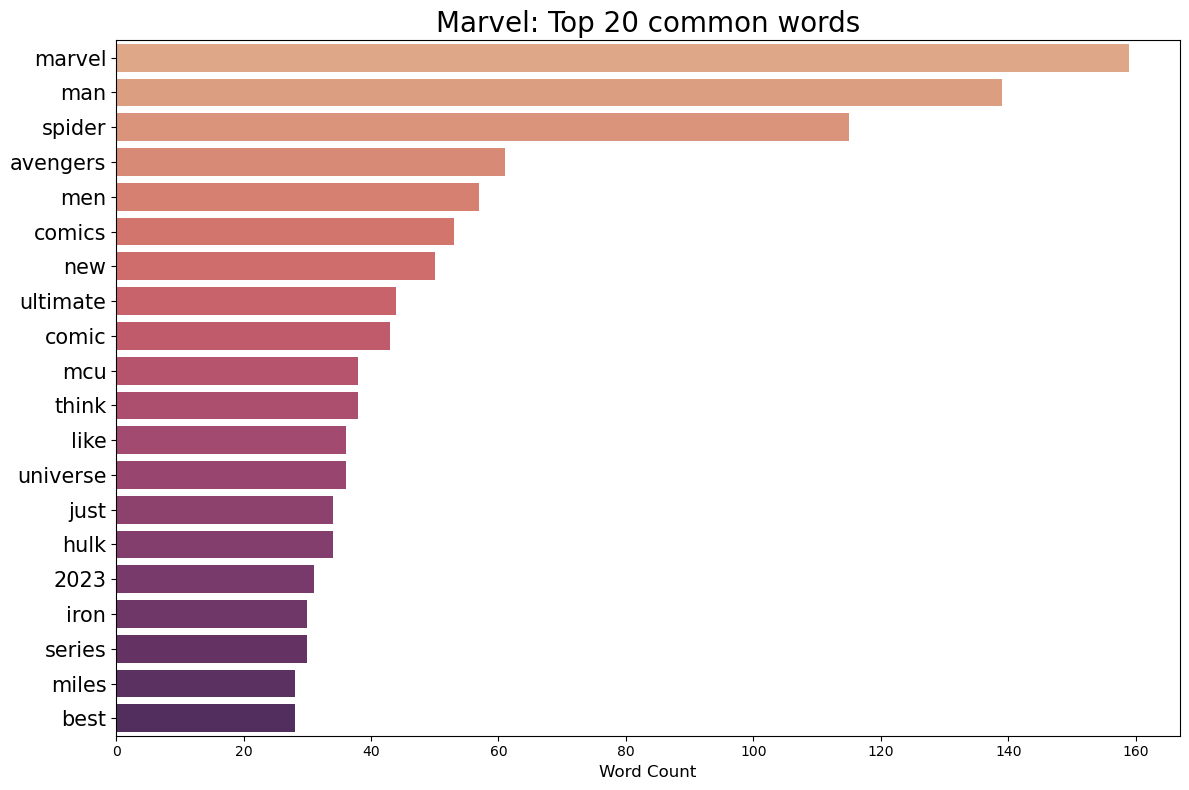

In [75]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Count', y=marvel_top_words.index , data=marvel_top_words, palette = "flare")
plt.title('Marvel: Top 20 common words',fontsize=20)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

In [76]:
# dc_cinematic top 20 common word
cv = CountVectorizer(stop_words='english')
cv.fit(dc_cinematic['title'])

dc_cinematic_post_cv = cv.transform(dc_cinematic['title'])
dc_cinematic_post_df = pd.DataFrame(dc_cinematic_post_cv.todense(), columns=cv.get_feature_names_out())

In [77]:
dc_cinematic_top_words = pd.DataFrame(dc_cinematic_post_df.sum().sort_values(ascending=False).head(20), columns = ['Count'])
dc_cinematic_top_words.T

,batman,blue,beetle,dcu,movie,dc,flash,superman,gunn,aquaman,james,dceu,like,think,new,movies,art,man,did,just
Count,141,130,125,106,102,94,88,84,68,65,63,62,60,59,45,38,34,34,33,32


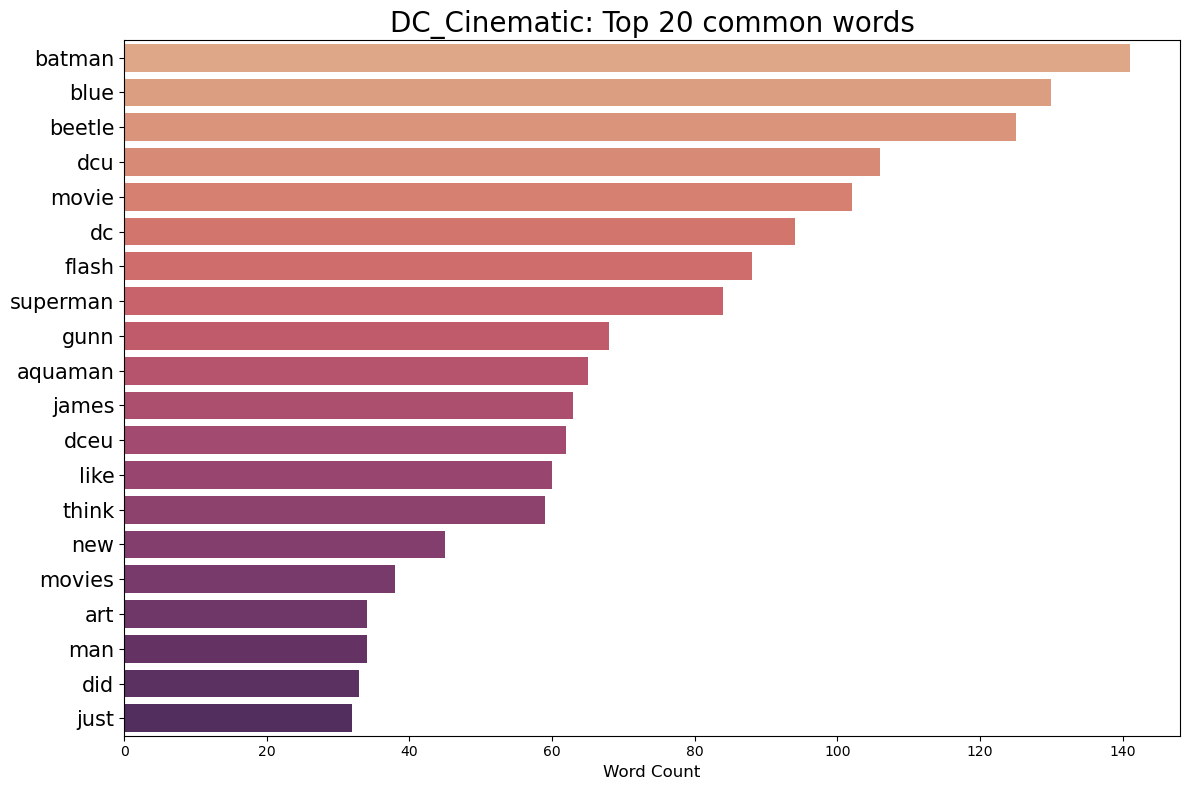

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Count', y=dc_cinematic_top_words.index , data=dc_cinematic_top_words, palette = "flare")
plt.title('DC_Cinematic: Top 20 common words',fontsize=20)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

#### Top 20 Tri-gram

In [79]:
# Marvel top 20: trigrams
cv_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams.fit(marvel['title'])

trigrams_cv = cv_trigrams.transform(marvel['title'])
trigrams_df = pd.DataFrame(trigrams_cv.todense(), columns=cv_trigrams.get_feature_names_out())

marvel_top_triwords = pd.DataFrame(trigrams_df.sum().sort_values(ascending=False).head(20), columns = ['Count'])
marvel_top_triwords

,Count
miles morales spider,17
morales spider man,17
spider man 2018,9
spider man 2022,7
new ultimate universe,6
oct 11 2023,6
oct 18 2023,5
spider man vs,5
evolution steven gordon,5
superior spider man,5


In [80]:
# dc_cinematic top 20: trigrams
cv_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams.fit(dc_cinematic['title'])

trigrams_cv = cv_trigrams.transform(dc_cinematic['title'])
trigrams_df = pd.DataFrame(trigrams_cv.todense(), columns=cv_trigrams.get_feature_names_out())

dc_cinematic_top_triwords = pd.DataFrame(trigrams_df.sum().sort_values(ascending=False).head(20), columns = ['Count'])
dc_cinematic_top_triwords

,Count
aquaman lost kingdom,28
blue beetle movie,9
blue beetle director,8
james gunn dcu,8
office blue beetle,7
box office blue,7
rated pg 13,6
pg 13 allowed,6
13 allowed bomb,6
blue beetle makes,5


#### Sentiment Analysis

In [81]:
marvel_nlp = ['subreddit', 'title']
sent_marvel = pd.concat([marvel[marvel_nlp],marvel[marvel_nlp]], axis=0)
sent_marvel.reset_index(drop=True, inplace=True)

In [82]:
sent_marvel.head()

,subreddit,title
0,Marvel,If I were to make a season of “What If…?”.
1,Marvel,Dyed my hair red… anyone see the resemblance😂
2,Marvel,Has this been paid off yet? MIRACLE MAN (Timel...
3,Marvel,You have a choice to make: Doom is dead and yo...
4,Marvel,Loki and Sylvie Tribute


In [83]:
sent = SentimentIntensityAnalyzer()

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\0/nltk_data'
    - 'C:\\Users\\0\\OneDrive\\conda installer\\nltk_data'
    - 'C:\\Users\\0\\OneDrive\\conda installer\\share\\nltk_data'
    - 'C:\\Users\\0\\OneDrive\\conda installer\\lib\\nltk_data'
    - 'C:\\Users\\0\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
sentiment = [sent.polarity_scores(i) for i in sent_marvel['title']]

In [84]:
#get df for both subreddits
#concat both df
#EDA -lem,countvectori
 

Remember, you will need to pull *at least* 1000 posts from each subreddit, not just 25. Like I mentioned above, you can use the created_utc attribute of a post to keep track of the timestamp and ensure non-overlapping pulls. We will leave this work for you all to complete.

Once you have at least 1000 posts from each subreddit, you can do some EDA (perhaps maybe the most common words in each subreddit..?) Eventually, you will want to combine your two dataframes together to do modeling.

### Hopefully this is enough of a tutorial to help get you started! If you have any questions, let us know!

### Note: Rather than working in this template notebook, make a brand new "scraping" notebook (or script), with your own comments, so you can use this project in a portfolio!